**Import Libraries Needed**

In [35]:
#Import imortant libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

**Import The dataset**

In [ ]:
#In keras there is a dataset of almost 60000 images for training and 10000 for testing. defferent images of fashion items.
#They are indexed as 0 to 9
#it contains 28x28 dimension images
fashion_mnist = keras.datasets.fashion_mnist
#Now we will import training and testing data
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

#Now we will see how actually images looks
plt.imshow(train_images[0],cmap = 'gray' , vmin = 0,vmax = 255)
print(train_labels[0])
plt.show()

**Now we will define our Neural Network Structure.**

> 
We will create a neural network where it would have a input layr which will take a input of 28x28 image and It will have a hidden layr and finally outputs numbers from 0 to 9 which will be labels for a object related to fashion products which we defined in out dataset. 
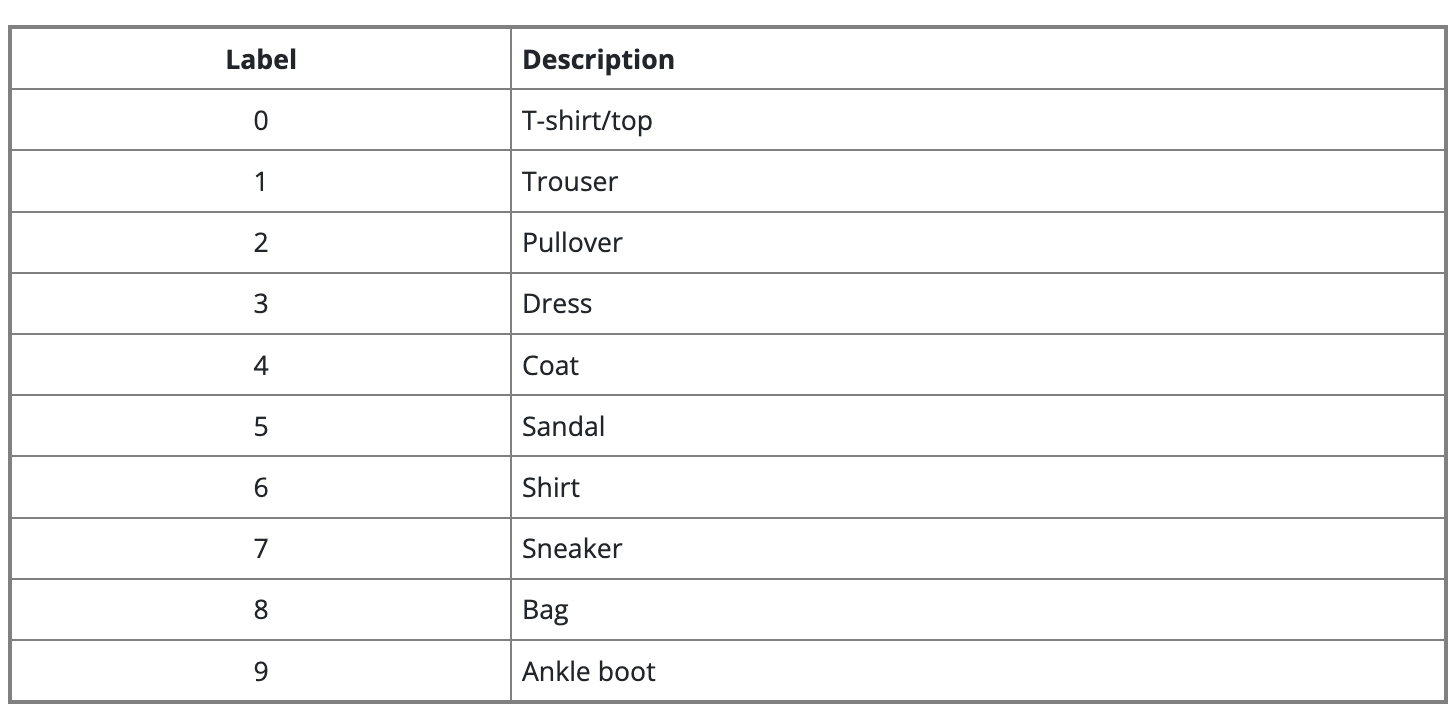

In [37]:
#Define the structure
model = keras.Sequential([
  #input layr will take a 28x28 image for we are taking 28x28 nodes
  keras.layers.Flatten (input_shape=(28,28)),
  #Layr:2 hidden layer is 128 nodes. Relu is used as activation function
  keras.layers.Dense(units=128, activation=tf.nn.relu),
  #Layr:3 hidden layer is 128 nodes. Leaky Relu is used as activation function and it's angle alpha is given as 0.01
  keras.layers.Dense(units=128, activation=keras.layers.LeakyReLU(alpha=0.01)),
  #Layr:3 output is 0-10 (depending on what piece of clothing it is).SoftMax is used as axctivation function
  keras.layers.Dense(units=10, activation=tf.nn.softmax)
])


# Compile our model
#In above we gave a structure but here we are actually creating the Network
#here optimizer will help in back propagation and adjustment of weights
#Here we are using sparse_categorical_crossentropy as a loss function
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy')

**Now we will train our data in some fix epochs**

In [ ]:
# Train our model, using our training data
#We will train our model with training images and training labels 
#We will do 5 epochs means we will pass same data 5 times
model.fit(train_images, train_labels, epochs=10)

**Now we will evaluate our trained model based on our testing data.**

In [ ]:
# Test our model, using our testing data
test_loss = model.evaluate(test_images, test_labels)

**Now we will make the predictions.**

In [ ]:
# Make predictions
#Give input any of the image and it will give us the probailities at all the output nodes 
#Whichever will be maximum that would be our answer
predictions = model.predict(test_images)
print(predictions[0])

**Now Extract the output from given output of the Neural Network.**

In [ ]:
#This will see output of all the nodes at output layr and gives the label of node which has maximum one
print(list(predictions[0]).index(max(predictions[0])))